In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input

In [2]:
model = Sequential()
model.add(Input(shape=(28,28,1)))

model.add(Conv2D(6, 5, activation='sigmoid', kernel_initializer='random_uniform')) # 24,24
model.add(AveragePooling2D(pool_size=(2,2))) # 12,12

model.add(Conv2D(16, 5, activation='sigmoid', kernel_initializer='random_uniform')) # 8,8
model.add(AveragePooling2D(pool_size=(2,2))) # 4,4

model.add(Flatten()) # 5*5*15 크기의 1차원 배열
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(83, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 83)                  │          10,043 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             840 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,295 (173.03 KB)

 Trainable params: 44,295 (173.03 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [4]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [5]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [6]:
model.fit(X_train, y_train, batch_size=200, epochs=20)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1276 - loss: 2.3072
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7940 - loss: 0.7730
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9000 - loss: 0.3541
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9252 - loss: 0.2523
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9398 - loss: 0.2007
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9526 - loss: 0.1608
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9570 - loss: 0.1411
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9661 - loss: 0.1149
Epoch 9/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9682 - loss: 0.1055
Epoch 10/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9712 - loss: 0.0939
Epoch 11/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9751 - loss: 0.0821
Epoch 12/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

In [7]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9820 - loss: 0.0560


[0.048599883913993835, 0.9850000143051147]

# Inception Module
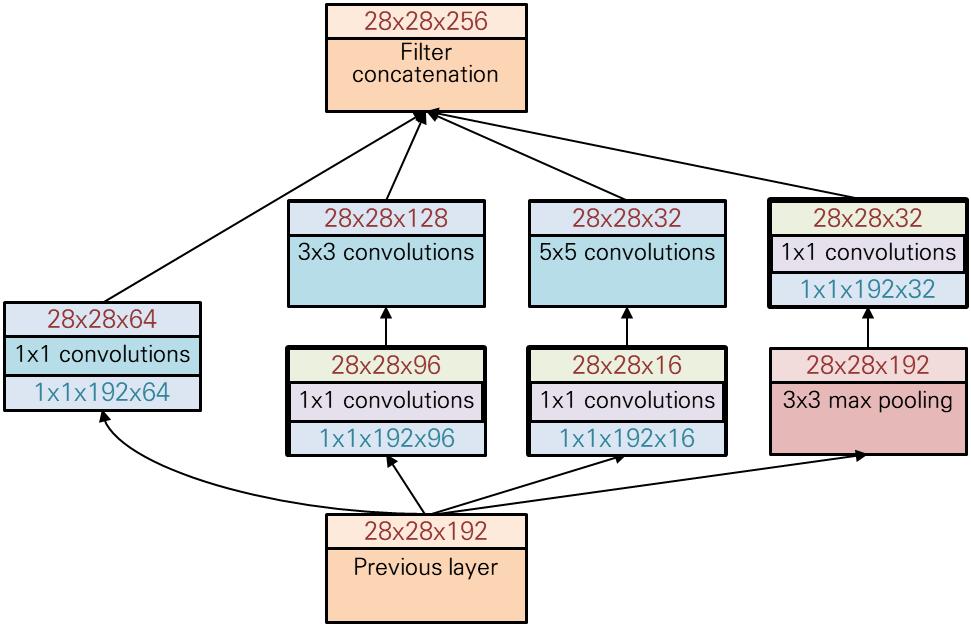

In [9]:
from tensorflow.keras import Model
from tensorflow.keras import layers

In [10]:
model_input = layers.Input(shape=(28,28,3))
# pre = Dense(192)(model_input)
x = layers.Dense(192)
pre = x(model_input)

conv1 = layers.Conv2D(64, 1, activation='relu', padding='same')(pre)

conv1_2 = layers.Conv2D(96, 1, activation='relu', padding='same')(pre) # 추가한 1x1 합성곱층
conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv1_2)

conv1_3 = layers.Conv2D(16, 1, activation='relu', padding='same')(pre)
conv3 = layers.Conv2D(32, 5, activation='relu', padding='same')(conv1_3)

pool = layers.MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(pre)
conv1_4 = layers.Conv2D(32, 1, activation='relu', padding='same')(pool)

model_output = layers.concatenate([conv1, conv2, conv3, conv1_4])
model = Model(inputs=model_input, outputs=model_output)
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 28, 28, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 28, 28, 192)       │             768 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 28, 28, 96)        │          18,528 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 28, 28, 16)        │           3,088 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 28, 28, 192)       │               0 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 28, 28, 64)        │          12,352 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 28, 28, 128)       │         110,720 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 28, 28, 32)        │          12,832 │ conv2d_5[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 28, 28, 32)        │           6,176 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 28, 28, 256)       │               0 │ conv2d_2[0][0],            │
│                               │                           │                 │ conv2d_4[0][0],            │
│                               │                           │                 │ conv2d_6[0][0],            │
│                               │                           │                 │ conv2d_7[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 164,464 (642.44 KB)

 Trainable params: 164,464 (642.44 KB)

 Non-trainable params: 0 (0.00 B)

# Residual Block

In [12]:
model_input = Input(shape=(28,28,3))
x = Conv2D(128, 3, padding='same', activation='relu')(model_input) # 이전층을 하나 정의함

conv = Conv2D(64, 3, padding='same', activation='relu')(x) # Residual Block 안의 첫 번째 합성곱충
conv = Conv2D(128, 3, padding='same')(conv)                # Residual Block 안의 두 번째 합성곱충
y = layers.add([conv, x])                                  # Residual Block의 입력과 출력을 add함, 각 요소가 add됨
y = layers.Activation('relu')(y)

model = Model(inputs=model_input, outputs=y)
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 28, 28, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 28, 28, 128)       │           3,584 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 28, 28, 64)        │          73,792 │ conv2d_8[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_10 (Conv2D)            │ (None, 28, 28, 128)       │          73,856 │ conv2d_9[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 28, 28, 128)       │               0 │ conv2d_10[0][0],           │
│                               │                           │                 │ conv2d_8[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 28, 28, 128)       │               0 │ add[0][0]                  │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 151,232 (590.75 KB)

 Trainable params: 151,232 (590.75 KB)

 Non-trainable params: 0 (0.00 B)